In [2]:
# Importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [80]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

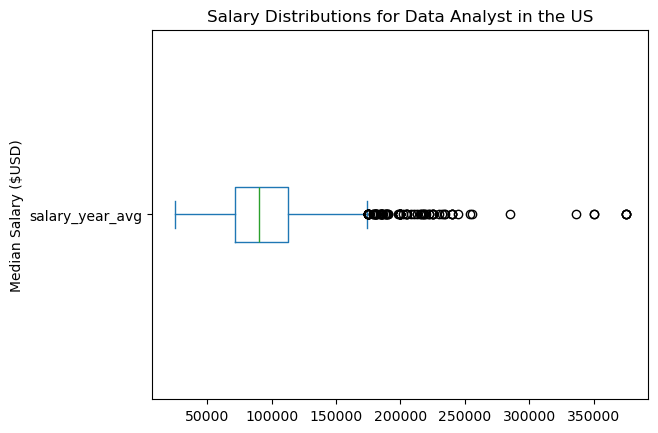

In [81]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

plt.title('Salary Distributions for Data Analyst in the US')
plt.ylabel('Median Salary ($USD)')
plt.show()

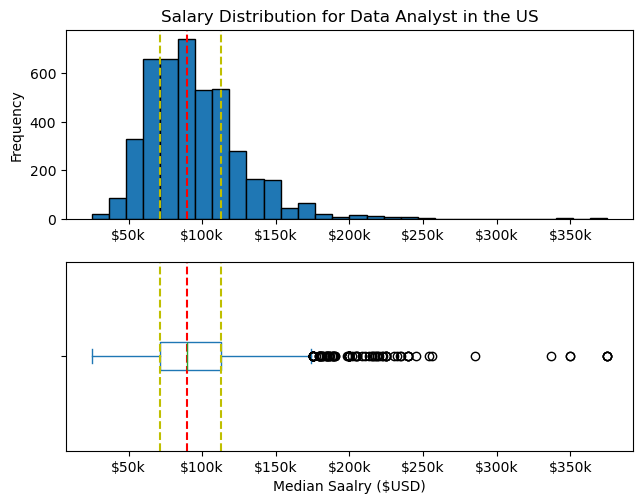

In [103]:
# Plot histogram and boxplot for df_DA_US['salary_year_avg'] on same figure
fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad=1)

df_DA_US['salary_year_avg'].plot(kind='hist', ax=ax[0], bins=30, edgecolor='black')
ax[0].set_title('Salary Distribution for Data Analyst in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# Lines
ax[0].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')

df_DA_US['salary_year_avg'].plot(kind='box', ax=ax[1], vert=False)
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Saalry ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# Lines
ax[1].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')

plt.show()

In [105]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])
df_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


C:\Users\joaqu\AppData\Local\Temp\ipykernel_7180\1536401885.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


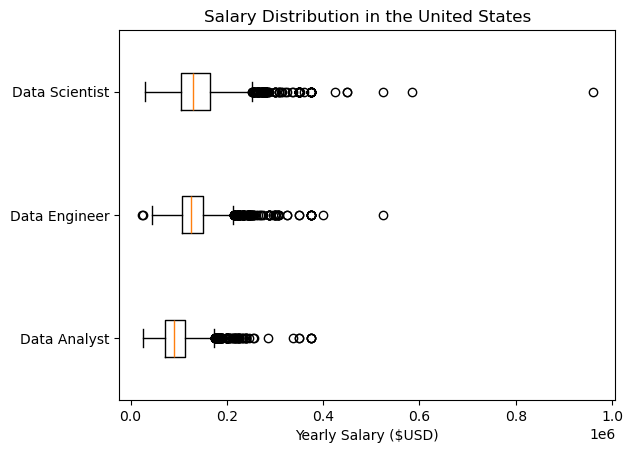

In [107]:
# List of salaries for each job title
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.show()

# Problems

In [108]:
# Data Scientist Hourly Salary Box Plot
df_DS = df[df['job_title_short'] == 'Data Scientist']
df_DS = df_DS.dropna(subset=['salary_hour_avg'])

df_DS

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
448,Data Scientist,Jnr Data Scientist for exciting projects with ...,Anywhere,via Upwork,Full-time,True,Sudan,2023-05-26 13:40:09,False,False,Sudan,hour,NaN,9.500000,Upwork,"[r, python, aws, azure, tidyverse, excel, powe...","{'analyst_tools': ['excel', 'powerpoint'], 'cl..."
734,Data Scientist,"Data Scientist - NLP, regex, OpenCV, Python, A...",Anywhere,via Upwork,Contractor,True,"Illinois, United States",2023-04-23 13:04:21,False,False,United States,hour,NaN,15.000000,Upwork,"[python, aws]","{'cloud': ['aws'], 'programming': ['python']}"
881,Data Scientist,Data Scientist with expertise in deep learning...,Anywhere,via Upwork,Contractor,True,"Texas, United States",2023-07-02 13:05:15,False,False,United States,hour,NaN,35.500000,Upwork,None,None
1100,Data Scientist,"Data Scientist - R, Python","Tallahassee, FL",via Dice,Contractor,False,Georgia,2023-11-21 14:40:41,False,False,United States,hour,NaN,67.500000,"ArnAmy, Inc.","[python, r, sql, azure, pandas, hadoop, spark]","{'cloud': ['azure'], 'libraries': ['pandas', '..."
1382,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Contractor,True,Sudan,2023-08-07 14:28:43,False,False,Sudan,hour,NaN,115.000000,Insight Global,"[python, r, sas, sas, sql]","{'analyst_tools': ['sas'], 'programming': ['py..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783522,Data Scientist,Data Scientist,"Los Angeles, CA",via LinkedIn,Contractor,False,"California, United States",2023-01-19 06:05:26,False,False,United States,hour,NaN,85.000000,"iSpace, Inc.","[python, aws]","{'cloud': ['aws'], 'programming': ['python']}"
783753,Data Scientist,Data Scientist 3 - Full-time / Part-time,"Augusta, GA",via Snagajob,Full-time and Part-time,False,Georgia,2023-10-13 07:18:54,False,False,United States,hour,NaN,31.974998,iNovex Information Systems,"[c, shell, bash, python, perl]","{'programming': ['c', 'shell', 'bash', 'python..."
783976,Data Scientist,Data Scientist - Contract to Hire,Anywhere,via Upwork,Contractor and Temp work,True,Sudan,2023-09-17 06:13:28,False,False,Sudan,hour,NaN,22.500000,Upwork,[azure],{'cloud': ['azure']}
785476,Data Scientist,"Data Scientist, Lead","Washington, DC",via Snagajob,Full-time and Part-time,False,Georgia,2023-11-01 06:58:10,False,True,United States,hour,NaN,47.620003,Booz Allen Hamilton,"[databricks, azure, aws]","{'cloud': ['databricks', 'azure', 'aws']}"


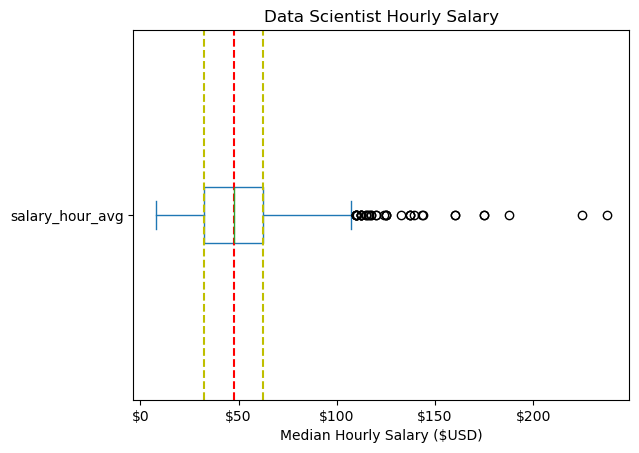

In [118]:
df_DS['salary_hour_avg'].plot(kind='box', vert=False)
plt.title('Data Scientist Hourly Salary')
plt.xlabel('Median Hourly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))
ax.axvline(df_DS['salary_hour_avg'].median(), color='r', linestyle='--')
ax.axvline(df_DS['salary_hour_avg'].quantile(0.25), color='y', linestyle='--')
ax.axvline(df_DS['salary_hour_avg'].quantile(0.75), color='y', linestyle='--')

C:\Users\joaqu\AppData\Local\Temp\ipykernel_7180\1713428547.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(countries_list, labels=countries, vert=False)


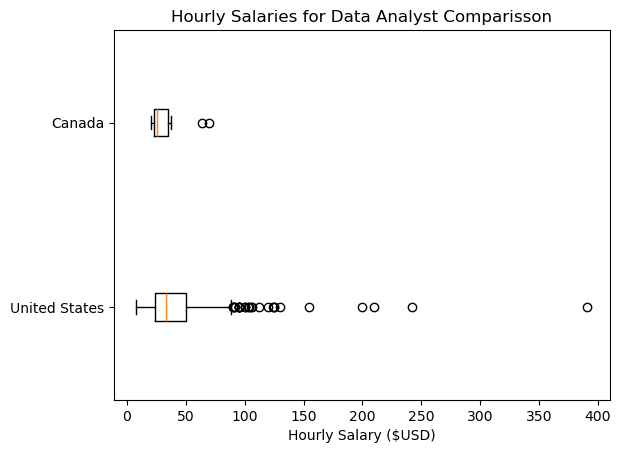

In [127]:
# Comparisson of Hourly Salaries for Data Analyst
countries = ['United States', 'Canada']

df_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'].isin(countries))].dropna(subset=['salary_hour_avg'])

countries_list = [df_DA[df_DA['job_country'] == country]['salary_hour_avg'] for country in countries]

plt.boxplot(countries_list, labels=countries, vert=False)
plt.title('Hourly Salaries for Data Analyst Comparisson')
plt.xlabel('Hourly Salary ($USD)')
plt.show()

C:\Users\joaqu\AppData\Local\Temp\ipykernel_7180\2750588060.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


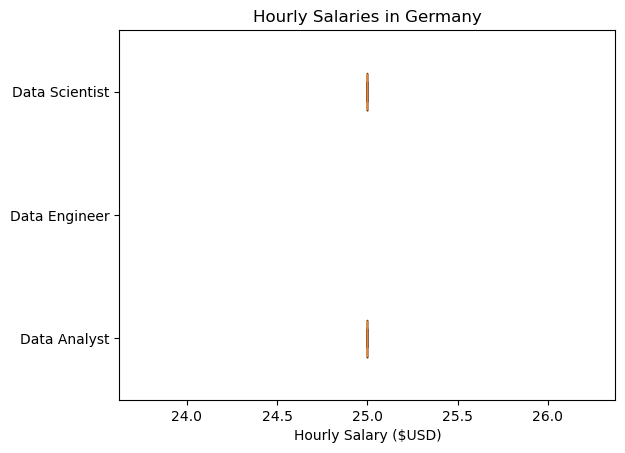

In [136]:
# Comparisson of Hourly Salaries in Germany
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_copy = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'Germany')].dropna(subset=['salary_hour_avg']).copy()

job_list = [df_copy[df_copy['job_title_short'] == job_title]['salary_hour_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Hourly Salaries in Germany')
plt.xlabel('Hourly Salary ($USD)')
plt.show()